# Домашнее задание 2

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
np.random.seed(42)

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
data, target, coefs = datasets.make_regression(n_samples = 10000, n_features = 3, n_informative = 10,
                                                      coef = True, random_state = 2)
data, target,coefs

(array([[ 1.3607783 ,  0.71525692,  0.85783197],
        [ 0.37775917, -0.29667201, -0.06182994],
        [-0.88654363, -0.24719785,  1.11096608],
        ...,
        [ 0.4138366 ,  0.8892254 ,  0.33102454],
        [ 0.68375954, -0.05269702,  0.46880535],
        [ 0.58324503, -2.42122021,  0.06580707]]),
 array([146.34159015,  28.56559203, -67.54856777, ...,  55.94156301,
         67.6975316 ,  16.03126635]),
 array([90.18332957, 15.50017954, 14.61295732]))

In [3]:
def calc_mse(y_pred, y):
    return np.mean((y - y_pred) ** 2)

In [4]:
def classic_grad_fit_reg(X, y, alpha=1e-3, target_diff=1e-5, iterations=None):
    '''
    Метод классического градиентного спуска.
    Рализовал двумя способами
    1. При задании количества итерации. Функция не закончится, пока не выполненит заданное количество итераций
    2. При отсутсвии заданного количества итераций. Функция не закончится, пока не достигнет заданного изменения mse
    '''
    
    W = np.zeros(X.shape[1])
    W_list = [W.copy()]
    mse = calc_mse(np.dot(X, W), y)
    mse_list = []
    if iterations != None:
        for i in range(iterations):
            mse_list.append(mse)
            W -= alpha * 2 * np.dot((np.dot(X, W) - y), X) / X.shape[0]
            W_list.append(W)
            mse = calc_mse(np.dot(X, W), y)
            if i % (iterations / 5) == 0:
                print(i, W, mse)
    else:
        diff = np.inf
        while target_diff < diff:
            W -= alpha * 2 / X.shape[0] * np.dot((np.dot(X, W) - y), X)
            W_list.append(W)
            new_mse = calc_mse(np.dot(X, W), y)
            mse_list.append(new_mse)
            diff = mse - new_mse
#             print(W, new_mse, diff)
            mse = new_mse
    return W, W_list, mse_list

In [5]:
def stochastic_grad_fit_reg(X, y, qty_in_batch=None, alpha=1e-3, iterations=None):
    '''
    Вариант Стахостического градиентного спуска, который предоставлен предподавателем
    '''
    n = X.shape[1]
    if qty_in_batch == None:
        qty_in_batch = n
    n_batch = np.math.ceil(n / qty_in_batch)
    W = np.zeros(n)
    W_list = []
    mse_list = []
    train_ind = np.random.randint(X.shape[0])
    for i in range(iterations):
        W_list.append(W)
        y_pred = np.dot(X, W)
        mse = calc_mse(y_pred, y)
        mse_list.append(mse)
        for ii in range(n_batch):
            batch_start = ii * qty_in_batch
            batch_end = (ii + 1) * qty_in_batch
            
            X_tmp = X[batch_start:batch_end, :]
            y_tmp = y[batch_start:batch_end]
            
            W -= alpha * 2 * np.dot((np.dot(X_tmp, W) - y_tmp), X_tmp) / n
        if i % (iterations / 5) == 0:
            print(i, '\t', W, mse)
    return W, W_list, mse_list

In [6]:
def stochastic_grad_fit_reg2(X, y, qty_in_batch=None, alpha=1e-3, iterations=None):
    '''
    Вариант Стахостического градиентного спуска, который совмещает вариант из методички к уроку
    и вариант, предоставленный преподавателем.
    '''
    n = X.shape[1]
    if qty_in_batch == None:
        qty_in_batch = n
    W = np.zeros(n)
    W_list = []
    mse_list = []
    train_ind = np.random.randint(X.shape[0])
    for i in range(iterations):
        W_list.append(W)
        y_pred = np.dot(X, W)
        mse = calc_mse(y_pred, y)
        mse_list.append(mse)
        train_ind = np.random.randint(low=0, high=X.shape[0])
        batch_start = train_ind * qty_in_batch
        batch_end = (train_ind + 1) * qty_in_batch

        X_tmp = X[batch_start:batch_end, :]
        y_tmp = y[batch_start:batch_end]

        W -= alpha * 2 * np.dot((np.dot(X_tmp, W) - y_tmp), X_tmp) / n
        if i % (iterations / 5) == 0:
            print(i, '\t', W, mse)
    return W, W_list, mse_list

In [7]:
def stochastic_grad_fit_reg3(X, y, qty_in_batch=None, alpha=1e-3, iterations=None):
    '''
    Вариант стахостического градиентного спуска из методички к уроку
    '''
    n = X.shape[1]
    if qty_in_batch == None:
        qty_in_batch = n
    W = np.zeros(n)
    W_list = []
    mse_list = []
    train_ind = np.random.randint(X.shape[0])
    for i in range(iterations):
        W_list.append(W)
        y_pred = np.dot(X, W)
        mse = calc_mse(y_pred, y)
        mse_list.append(mse)
        train_ind = np.random.randint(X.shape[0])

        X_tmp = X[train_ind, :]
        y_tmp = y[train_ind]

        W -= alpha * 2 * np.dot((np.dot(X_tmp, W) - y_tmp), X_tmp) / n
        if i % (iterations / 5) == 0:
            print(i, '\t', W, mse)
    return W, W_list, mse_list

In [8]:
iterations = 100

In [9]:
W, W_list, mse_list = classic_grad_fit_reg(data, target, 
                                           alpha=0.1, 
                                           iterations=iterations
                                          )

0 [18.31998948  3.32672741  2.89304628] 5540.456898136405
20 [89.41624335 15.4105859  14.46995147] 0.626375683390612
40 [90.17511345 15.49970268 14.61119482] 7.181190074223112e-05
60 [90.18324123 15.50018018 14.61293544] 8.380876857408824e-09
80 [90.18332861 15.50017961 14.61295705] 9.99777729149775e-13


In [10]:
W_s, W_list_s, mse_list_s = stochastic_grad_fit_reg(data, target, 
                                                    alpha=0.1, 
                                                    qty_in_batch=3,
                                                    iterations=iterations
                                                   )

0 	 [17.98760845  7.52633893  3.24840785] 8729.992415032719
20 	 [83.39473404 30.79580697 12.41691864] 289.32367510073743
40 	 [85.18358375 27.86655699 12.63213951] 184.49148748370018
60 	 [86.19307909 25.3880839  13.01075835] 117.94312677742694
80 	 [86.99313807 23.40627416 13.33071107] 75.40367835568009


In [11]:
W_s2, W_list_s2, mse_list_s2 = stochastic_grad_fit_reg2(data, target, 
                                                        alpha=0.1,
                                                        qty_in_batch=3,
                                                        iterations=iterations
                                                   )

0 	 [0. 0. 0.] 8729.992415032719
20 	 [52.1122693  10.02009598  2.87045742] 1641.1675624332922
40 	 [86.00026522 17.41863831 10.36714567] 38.99429221176052
60 	 [89.4504698  16.42540197 14.54150566] 1.39180532320827
80 	 [89.98559899 15.63746158 14.53306001] 0.06393794839922234


In [12]:
W_s3, W_list_s3, mse_list_s3 = stochastic_grad_fit_reg3(data, target, 
                                                        alpha=0.1, 
                                                        qty_in_batch=3,
                                                        iterations=iterations
                                                   )

0 	 [ 6.66172116  1.25302954 -2.91005106] 8729.992415032719
20 	 [71.79316728  6.92524707 18.76888644] 449.05885259846707
40 	 [86.62985164 14.44476921 18.10243974] 29.802952632451255
60 	 [88.62657496 15.42382835 16.01513182] 4.956621809804728
80 	 [89.56050077 15.39673449 15.18252741] 0.9491177660705653


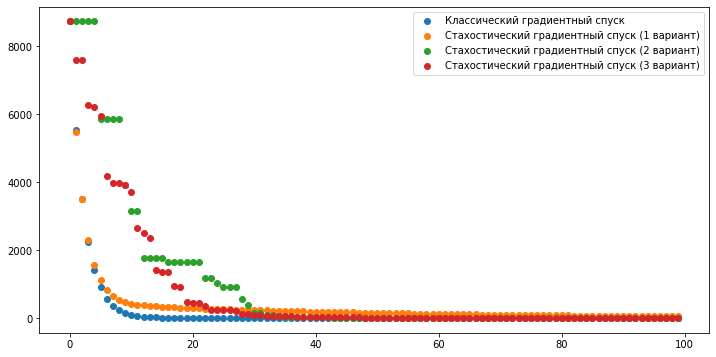

In [13]:
plt.figure(figsize = (12, 6))
plt.scatter(range(iterations), mse_list, label='Классический градиентный спуск')
plt.scatter(range(iterations), mse_list_s, label='Стахостический градиентный спуск (1 вариант)')
plt.scatter(range(iterations), mse_list_s2, label='Стахостический градиентный спуск (2 вариант)')
plt.scatter(range(iterations), mse_list_s3, label='Стахостический градиентный спуск (3 вариант)')
plt.legend()
plt.show()

## Вывод:
Для данного примера **классический** градиентный спуск является более оптимальным вариантом решения

### Попробуем реализовать решение классическим градиентным спуском с нормализацией и стандартизацией

In [14]:
def calc_mean_feat(x):
    return (x - x.min()) / (x.max() - x.min())

def my_MinMaxScaler(X):
    return np.array([X[:, i] if (X[:, i] == X[0, i]).all() else calc_mean_feat(X[:, i]) for i in range(X.shape[1])]).T

def calc_std_feat(x):
    return (x - x.mean()) / x.std()

def my_StandartScaler(X):
    return np.array([X[:, i] if (X[:, i] == X[0, i]).all() else calc_std_feat(X[:, i]) for i in range(X.shape[1])]).T

In [15]:
data_norm = my_MinMaxScaler(data)
data_std = my_StandartScaler(data)

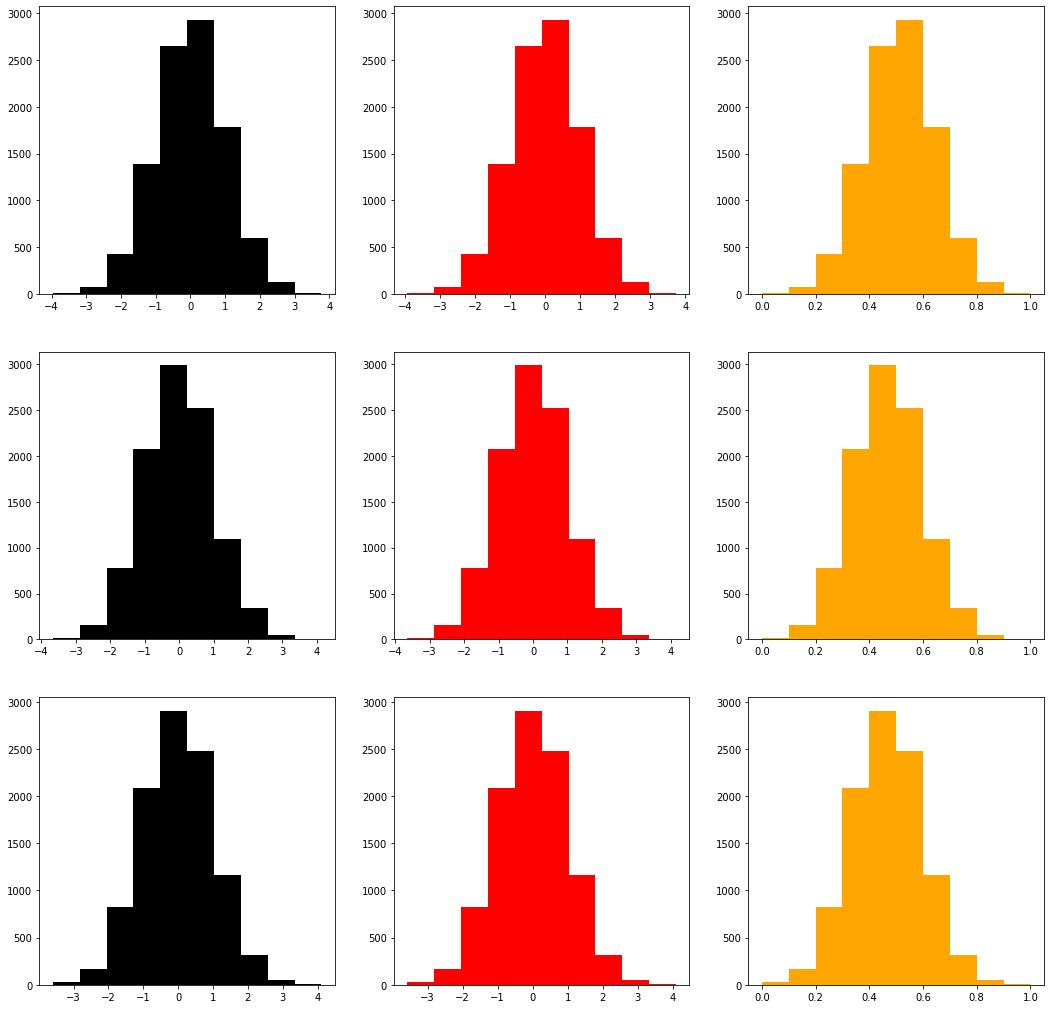

In [16]:
fig, axs = plt.subplots(data.shape[1], 3, figsize=(18, 18))
for i in range(data.shape[1]):
    axs[i, 0].hist(data[:, i], color='black')
    axs[i, 1].hist(data_std[:, i], color='red')
    axs[i, 2].hist(data_norm[:, i], color='orange')
plt.show()

In [17]:
W_norm, W_list_norm, mse_list_norm = classic_grad_fit_reg(data_norm, target, 
                                           alpha=0.1, 
                                           iterations=iterations
                                          )

0 [2.42327296 0.47601094 0.42460732] 8670.079357233384
20 [32.59218885 -5.48077904 -6.45088266] 8137.479128446086
40 [ 54.58727032 -16.71312817 -18.47846535] 7760.592643298057
60 [ 74.85879226 -27.48511161 -29.95048235] 7431.735728652808
80 [ 93.78761798 -37.58164665 -40.66157333] 7144.628855474712


In [18]:
W_std, W_list_std, mse_list_std = classic_grad_fit_reg(data_std, target, 
                                           alpha=0.1, 
                                           iterations=iterations
                                          )

0 [18.18447355  3.32617381  2.88278084] 5580.464947979207
20 [90.01465157 15.42232758 14.5170629 ] 1.0057097536973456
40 [90.84099595 15.51027016 14.66475673] 0.27622865847947414
60 [90.85053654 15.51067632 14.66666289] 0.2761317114679567
80 [90.85064711 15.51067378 14.66668778] 0.2761316983499421


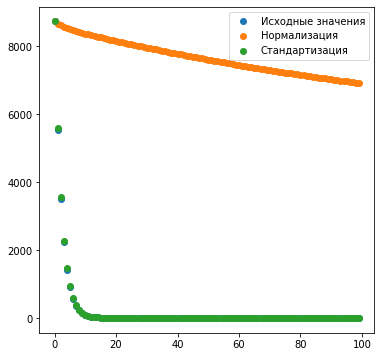

In [19]:
plt.figure(figsize = (6, 6))
plt.scatter(range(iterations), mse_list, label='Исходные значения')
plt.scatter(range(iterations), mse_list_norm, label='Нормализация')
plt.scatter(range(iterations), mse_list_std, label='Стандартизация')
plt.legend()
plt.show()

## Вывод
В данном примере, нормализация признаков лишь замедляет процесс обучения. Стандартизация не изменяет процесс обучения

2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [20]:
def stochastic_grad_fit_reg_wL(X, y, qty_in_batch=None, alpha=1e-3, iterations=None, lambda_=1e-8, L=2):
    '''
    Вариант стахостического градиентного спуска из методички к уроку
    '''
    n = X.shape[1]
    if qty_in_batch == None:
        qty_in_batch = n
    W = np.zeros(n)
    W_list = []
    mse_list = []
    train_ind = np.random.randint(X.shape[0])
    for i in range(iterations):
        W_list.append(W)
        y_pred = np.dot(X, W)
        mse = calc_mse(y_pred, y)
        mse_list.append(mse)
        train_ind = np.random.randint(X.shape[0])

        X_tmp = X[train_ind, :]
        y_tmp = y[train_ind]

        W -= alpha * (2 * np.dot((np.dot(X_tmp, W) - y_tmp), X_tmp) / n + lambda_ * np.linalg.norm(W, ord=L))
        if i % (iterations / 5) == 0:
            print(i, '\t', W, mse)
    return W, W_list, mse_list

In [21]:
W_s4, W_list_s4, mse_list_s4 = stochastic_grad_fit_reg_wL(data, target, 
                                                        alpha=0.1, 
                                                        qty_in_batch=3,
                                                        iterations=iterations,
                                                        lambda_=1e-4
                                                       )

0 	 [19.29386178  4.72946339 24.25508589] 8729.992415032719
20 	 [74.42795455  0.5249115  17.52797227] 876.483168677091
40 	 [87.42068908 13.32413757 17.08208802] 36.45975039573906
60 	 [88.55691189 15.00733692 15.93323873] 5.254522369464494
80 	 [89.85998478 15.36193268 14.85936963] 0.1875896894953388


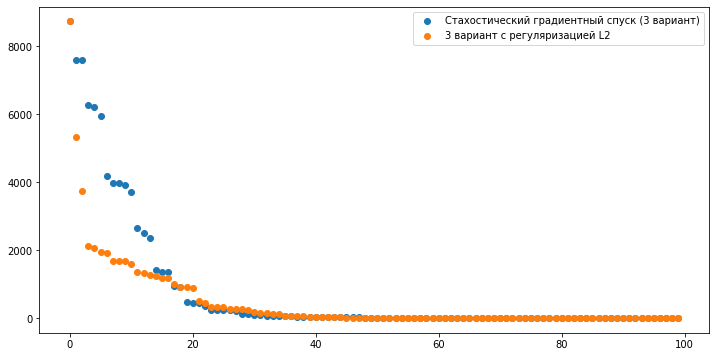

In [22]:
plt.figure(figsize = (12, 6))
plt.scatter(range(iterations), mse_list_s3, label='Стахостический градиентный спуск (3 вариант)')
plt.scatter(range(iterations), mse_list_s4, label='3 вариант с регуляризацией L2')
plt.legend()
plt.show()

3. [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [23]:
W_s5, W_list_s5, mse_list_s5 = stochastic_grad_fit_reg_wL(data, target, 
                                                        alpha=0.1, 
                                                        qty_in_batch=3,
                                                        iterations=iterations,
                                                        lambda_=1e-4,
                                                        L=1
                                                       )

0 	 [ 1.19196861  0.15584692 -3.25185036] 8729.992415032719
20 	 [75.99966754 18.1051055  18.26235223] 224.62155634366482
40 	 [87.2342903  13.05895414 14.02507474] 23.63528783656298
60 	 [89.75407667 14.93130197 13.99079299] 1.352860396463203
80 	 [89.9193243  15.34205325 14.2305049 ] 0.24701105075126692


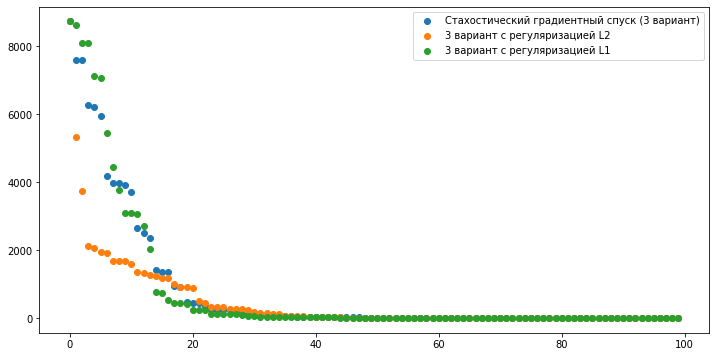

In [24]:
plt.figure(figsize = (12, 6))
plt.scatter(range(iterations), mse_list_s3, label='Стахостический градиентный спуск (3 вариант)')
plt.scatter(range(iterations), mse_list_s4, label='3 вариант с регуляризацией L2')
plt.scatter(range(iterations), mse_list_s5, label='3 вариант с регуляризацией L1')
plt.legend()
plt.show()

## Вывод:
Для данного примера $L_1$ регуляризация немного ускоряет процесс обучения, но, кажется, что это незначительное изменение, которым можно принебречь. Рассчитаем коэффициент детерминации $(R^2)$ для всех получившихся моделей.

In [25]:
def my_R_2(X, W, y):
    return 1 - ((np.dot(X, W) - y) ** 2).sum() / ((y - y.mean()) ** 2).sum()

In [26]:
print('Классический градиентный спуск: ', (my_R_2(data, W, target)))
print('Стахостический градиентный спуск (1): ', (my_R_2(data, W_s, target)))
print('Стахостический градиентный спуск (2): ', (my_R_2(data, W_s2, target)))
print('Стахостический градиентный спуск (3): ', (my_R_2(data, W_s3, target)))
print('Стахостический градиентный спуск (3) с Нормализацией: ', (my_R_2(data, W_s4, target)))
print('Стахостический градиентный спуск (3) с Стандартизацией: ', (my_R_2(data, W_s5, target)))

Классический градиентный спуск:  1.0
Стахостический градиентный спуск (1):  0.9944777755530939
Стахостический градиентный спуск (2):  0.999999630182628
Стахостический градиентный спуск (3):  0.9999993082326681
Стахостический градиентный спуск (3) с Нормализацией:  0.9999993169988068
Стахостический градиентный спуск (3) с Стандартизацией:  0.9999966276903283
